In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
rng = np.random.default_rng()

# 线性拟合

In [2]:
def mylinearfit(x,y,figuresize=(8,4),title='Linear Fit',labeldot='orginal data',labeline='fitted line',save=(),x_label='Time(s)', y_label='Voltage (V)'):
    res = stats.linregress(x, y)
    k=res.slope
    dk=res.stderr
    b=res.intercept
    db=res.intercept_stderr
    Rco=res.rvalue
    print(f"斜率为:k={k} ± {dk}\n截距为:b={b} ± {db}\nThe Pearson correlation coefficient:{Rco}")

    plt.figure(figsize=figuresize)
    plt.plot(x, y, 'o', label=labeldot)
    plt.plot(x, res.intercept + res.slope*x,'r', label=labeline)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    if len(save)!=0:
        plt.savefig(save)
    plt.show()

    return (k,dk), (b,db)

path='pic'

斜率为:k=1.5968351463768193 ± 0.017790827439250777
截距为:b=0.0019361345704975719 ± 0.010734687776547099
The Pearson correlation coefficient:0.9820026129375604


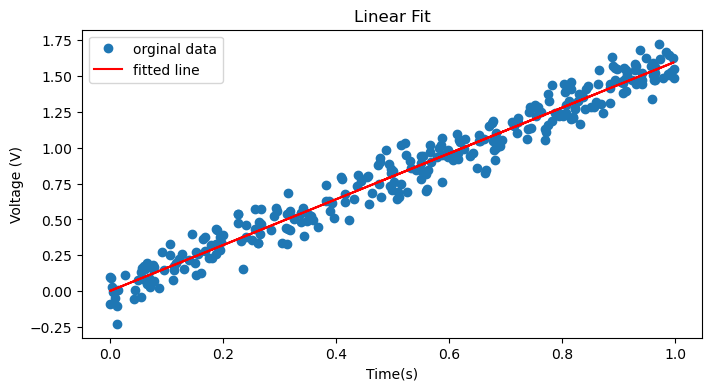

(1.5968351463768193, 0.017790827439250777)
(0.0019361345704975719, 0.010734687776547099)


In [3]:
save='linearfit.pdf'
x = rng.random(300)
y = 1.6*x +rng.normal(0, 0.1, 300)
k,d=mylinearfit(x,y,save=path+'/'+save)
print(k)
print(d)

# 打印不确定度

In [4]:
from math import log,floor

def print_result(x,dx,latex=0):
    order_x=floor(log(abs(x))/log(10))
    order_dx=floor(log(abs(dx))/log(10))
    value_x=x/10**order_x
    value_dx=dx/10**order_dx
    delord=order_x-order_dx
    value_dx=value_dx*10**(-delord)
    # order_x=log(x)/log(10)
    value_x_show=f"{value_x:.{delord}f}"
    value_dx_show=f"{value_dx:.{delord}f}"

    if latex==1:
        print(f'${value_x_show} \\pm {value_dx_show} \\times 10^{order_x}$')
    else:
        print(f'({value_x_show} ± {value_dx_show} )×10^{order_x}')